# Assessing Pregnancy Risks

## Let's explore our DataSet:

The data for this project was taken from Kaggle Datasets. It has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

Columns in the dataset:

Age: Age in years when a woman is pregnant.

SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

BS: Blood glucose levels is in terms of a molar concentration, mmol/L.

HeartRate: A normal resting heart rate in beats per minute.

Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

## Installing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import scipy.stats as stats 
from scipy.stats import chi2_contingency, boxcox

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [3]:
data = pd.read_csv("/kaggle/input/maternal-health-risk-data-set/Maternal_Risk.csv")

In [4]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          808 non-null    int64  
 1   SystolicBP   808 non-null    int64  
 2   DiastolicBP  808 non-null    int64  
 3   BS           808 non-null    float64
 4   BodyTemp     808 non-null    float64
 5   HeartRate    808 non-null    int64  
 6   RiskLevel    808 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [6]:
data[data.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
9,35,85,60,11.0,102.0,86,high risk
61,50,140,90,15.0,98.0,90,high risk
62,25,140,100,6.8,98.0,80,high risk
73,32,140,100,7.9,98.0,78,high risk
74,30,140,100,15.0,98.0,70,high risk
...,...,...,...,...,...,...,...
802,15,120,80,7.5,98.0,70,low risk
803,24,120,80,7.5,98.0,66,low risk
804,16,100,70,7.5,98.0,80,low risk
806,40,160,100,19.0,98.0,77,high risk


As we can see we have 562 rows duplicated so we have to remove them

In [7]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.297030
std,13.922075,19.924312,14.772207,3.617635,1.386501,8.822686
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
data[data.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
69,63,140,90,15.0,98.0,90,high risk
608,62,120,80,6.9,98.0,66,low risk
616,65,90,60,6.9,98.0,70,low risk
620,66,85,60,6.9,98.0,86,low risk
626,70,85,60,6.9,102.0,70,low risk
627,65,120,90,6.9,103.0,76,low risk
689,65,130,80,15.0,98.0,86,high risk
738,63,140,90,15.0,98.0,90,high risk


In [9]:
data[data.Age < 13]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
14,10,70,50,6.9,98.0,70,low risk
29,12,95,60,6.1,102.0,60,low risk
56,12,95,60,7.2,98.0,77,low risk
192,12,90,60,7.5,102.0,66,low risk
198,12,90,60,7.5,102.0,60,low risk
221,12,90,60,7.9,102.0,66,high risk
254,12,90,60,8.0,102.0,66,high risk
258,12,90,60,11.0,102.0,60,high risk
368,12,90,60,7.5,102.0,66,low risk
374,12,90,60,7.5,102.0,60,low risk


In [10]:
data.BodyTemp.value_counts()

BodyTemp
98.0     653
101.0     64
102.0     57
103.0     14
100.0      9
99.0       8
98.4       2
98.6       1
Name: count, dtype: int64

In [11]:
data[data.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
166,16,120,75,7.9,98.0,7,low risk
342,16,120,75,7.9,98.0,7,low risk
736,16,120,75,7.9,98.0,7,low risk


## Observations 

We have 1014 entries, as well as 7 features.

* The first 5 columns are stored as integers and floats, and the dtype of the last column (risk level) is object, which needs to be converted into numerical values for machine learning.
* RiskLevel will be our target or response variable and the rest of the features will be our predictor variables.
* There is no null values.
* There are a lot of dulicated rows.
* Range of age is from 10 till 70 years old. Even though it's uncommon, it is possible for some girls to be pregnant at 10 y.o., as well as for some women to be pregnant at 70 y.o.
* It is important to note that the minimum values of all columns are greater than 0.
* There is an observation with heart rate 7, which doesn't make sense. We will have to fix it. P.S. it looks like there are 2 observations, but it is actually one duplicated.

## Data Cleaning

In [12]:
df = data.copy()

In [13]:
#drop duplicated rows
#df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.shape

(808, 7)

There is an observation with heart rate 7, which doesn't make sense. Most probably, it was a mistake in data entry, but we do not know the correct value, it could be 70 or 67 or 77. Let's replace it with a mode of the column.

In [15]:
df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [16]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

# Encoding

In [17]:
df.RiskLevel.unique()

array(['high risk', 'low risk'], dtype=object)

In [18]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


# Outliers

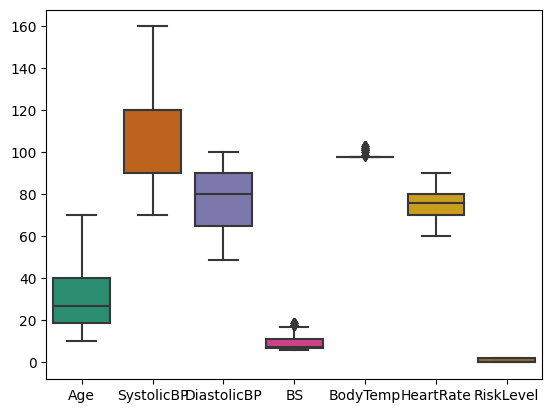

In [19]:
sns.set_palette("Dark2")

sns.boxplot(df);

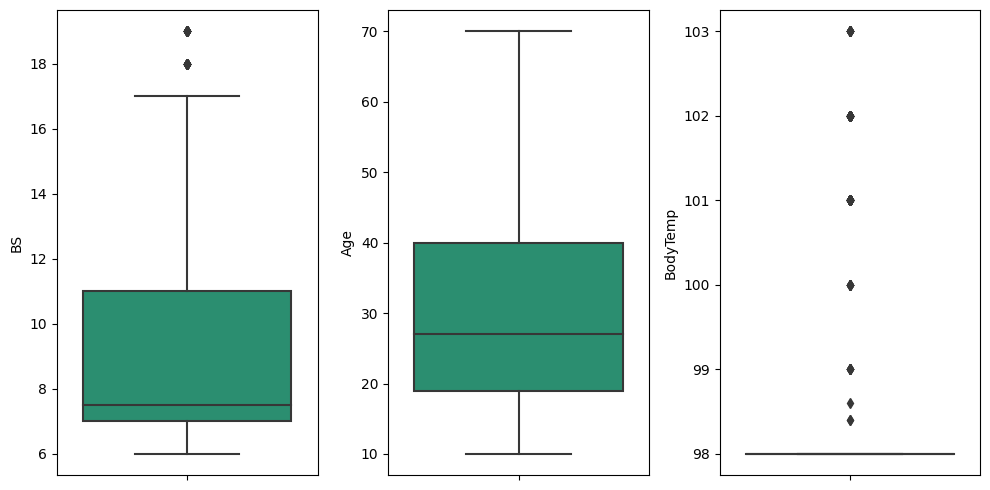

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'BodyTemp', data = df)

plt.tight_layout()
plt.show();

# AGE

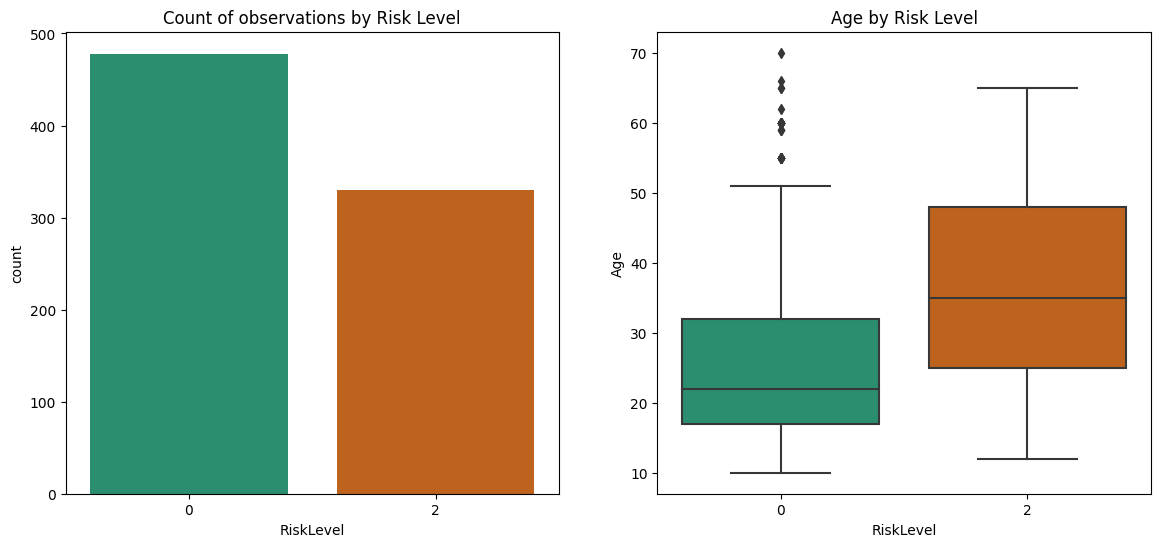

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel)
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age)
axes[1].set_title("Age by Risk Level");

# Blood Glucose Level

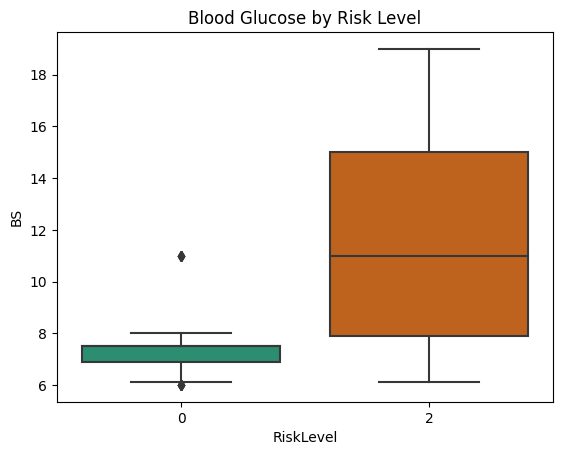

In [22]:
sns.boxplot(x=df.RiskLevel, y=df.BS).set_title("Blood Glucose by Risk Level");

# Blood Pressure

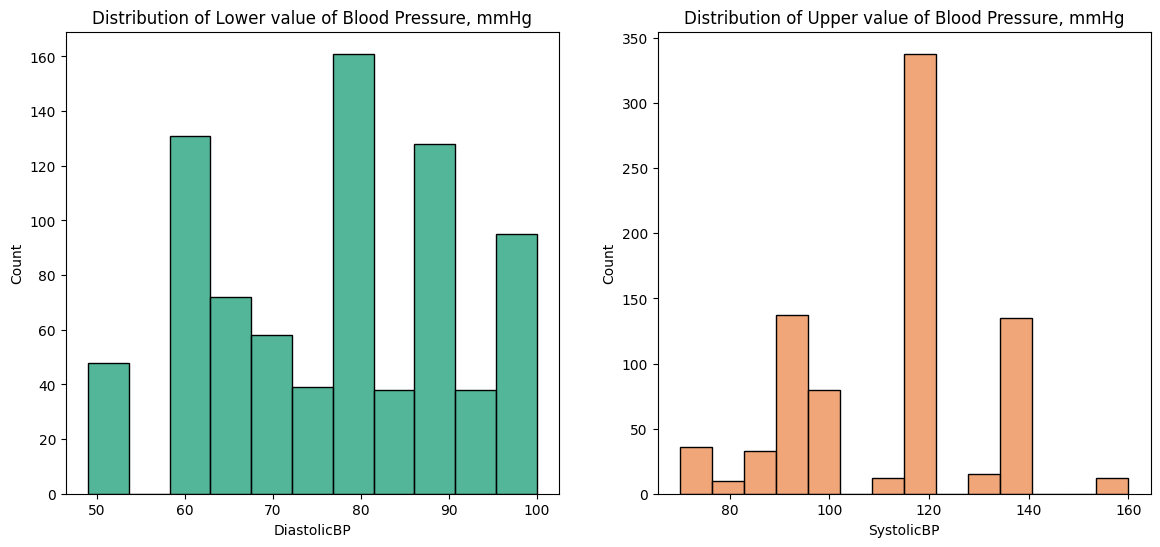

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg");

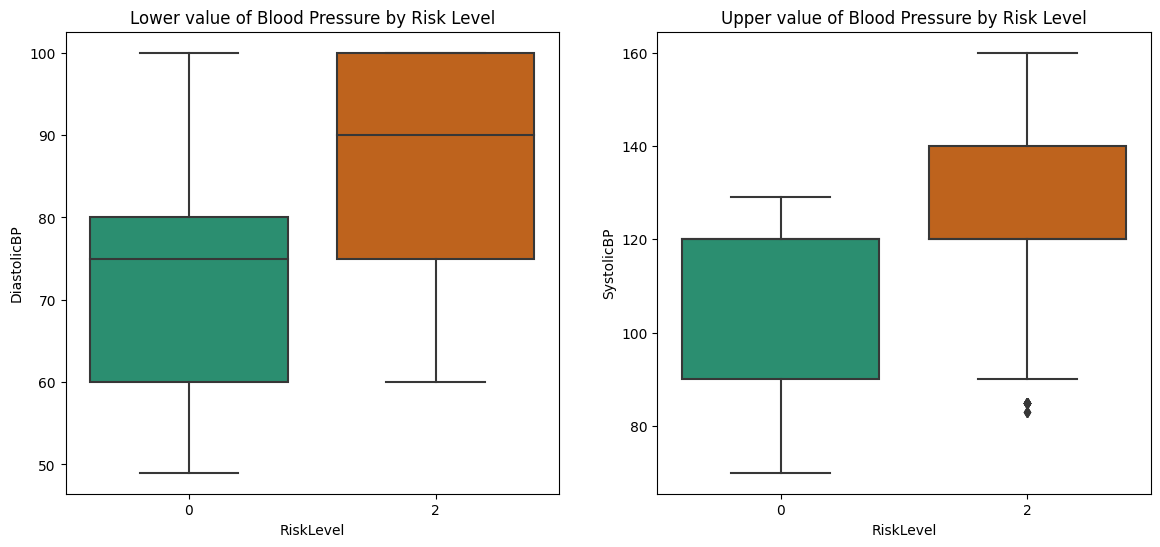

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP)
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP)
axes[1].set_title("Upper value of Blood Pressure by Risk Level");

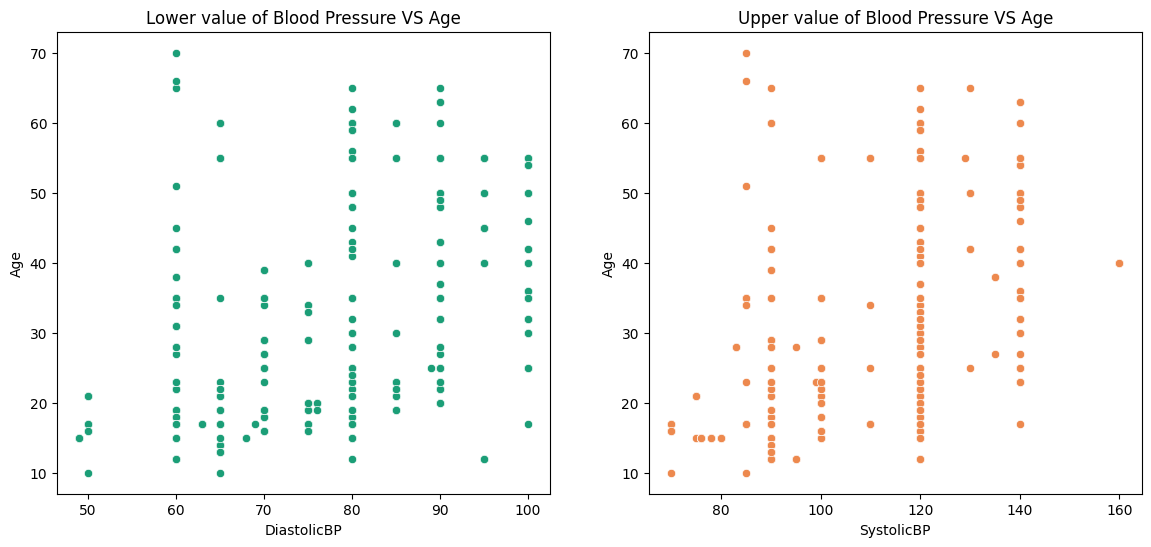

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.scatterplot(x=df.DiastolicBP, y=df.Age, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age")

sns.scatterplot(ax=axes[1], x=df.SystolicBP, y=df.Age, color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age");

# Body Temperature

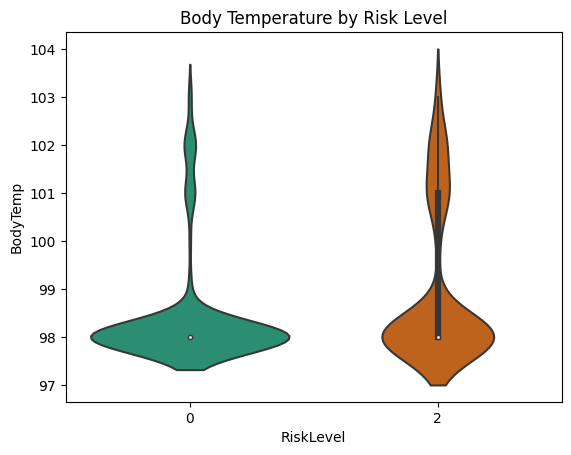

In [26]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel).set_title("Body Temperature by Risk Level");

# Heart Rate

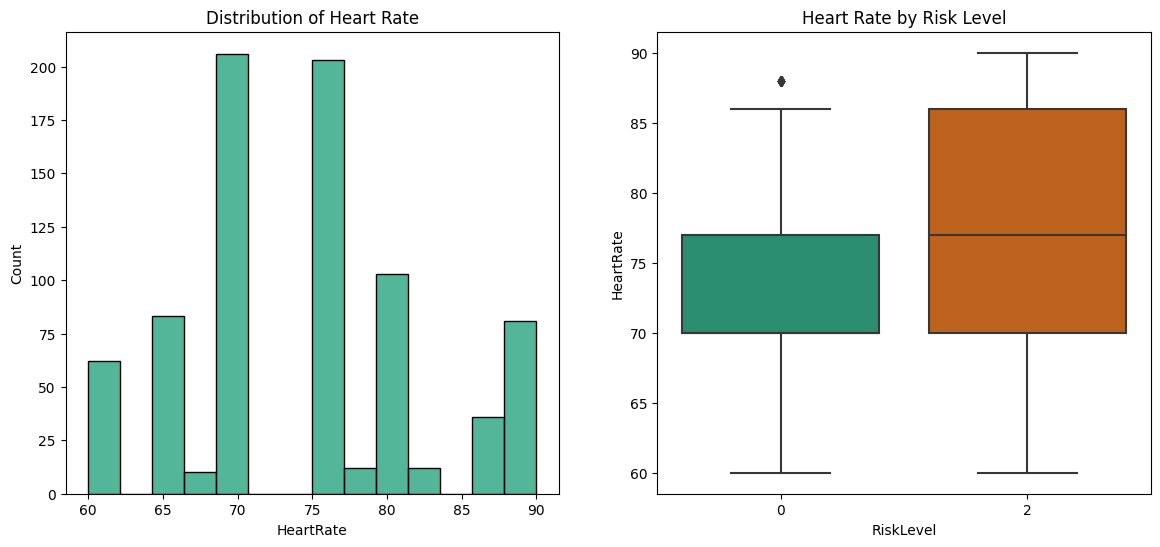

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level");

# Observations

* The low risk pregnancies are the most frequent overall, they happen in more than half of the cases.
* Younger women tend to have low and mid risk pregnancies, while the pregnancies of women above 35 y.o. more often are classified as high risk, thus, need more attention.
* If a pregnant woman has a blood sugar higher than 8 mmol/L, in most of the cases, the pregnancy is considered high risk.
* Distribution of lower value of blood pressure is more spread, around 60-100 mmHg, compared to distribution of upper value, which is centered around 120 mmHg.
* Higher blood pressure (both systolic and diastolic), higher body temperature are associated with higher risk pregnancies.
* As for correlation between age and blood pressure, very low blood pressure (both systolic and diastolic) was observed in some of the girls and young women, but normal and high blood pressure don't seem to be much correlated with age, at least in our dataset.
* Heart rate of pregnant women is normally distributed and it's only slightly associated with risk level.

# Correlation Matrix

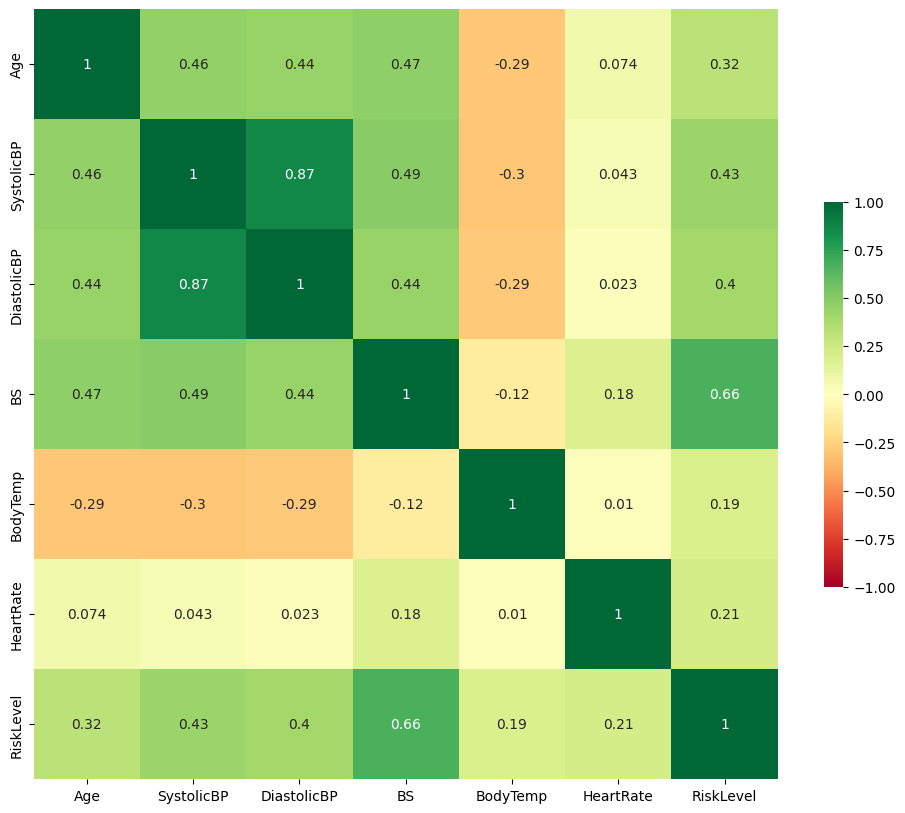

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

We can see that there is only one highly correlated variable with the RiskLevel, which is BS (blood sugar). 

# Skew DataSet

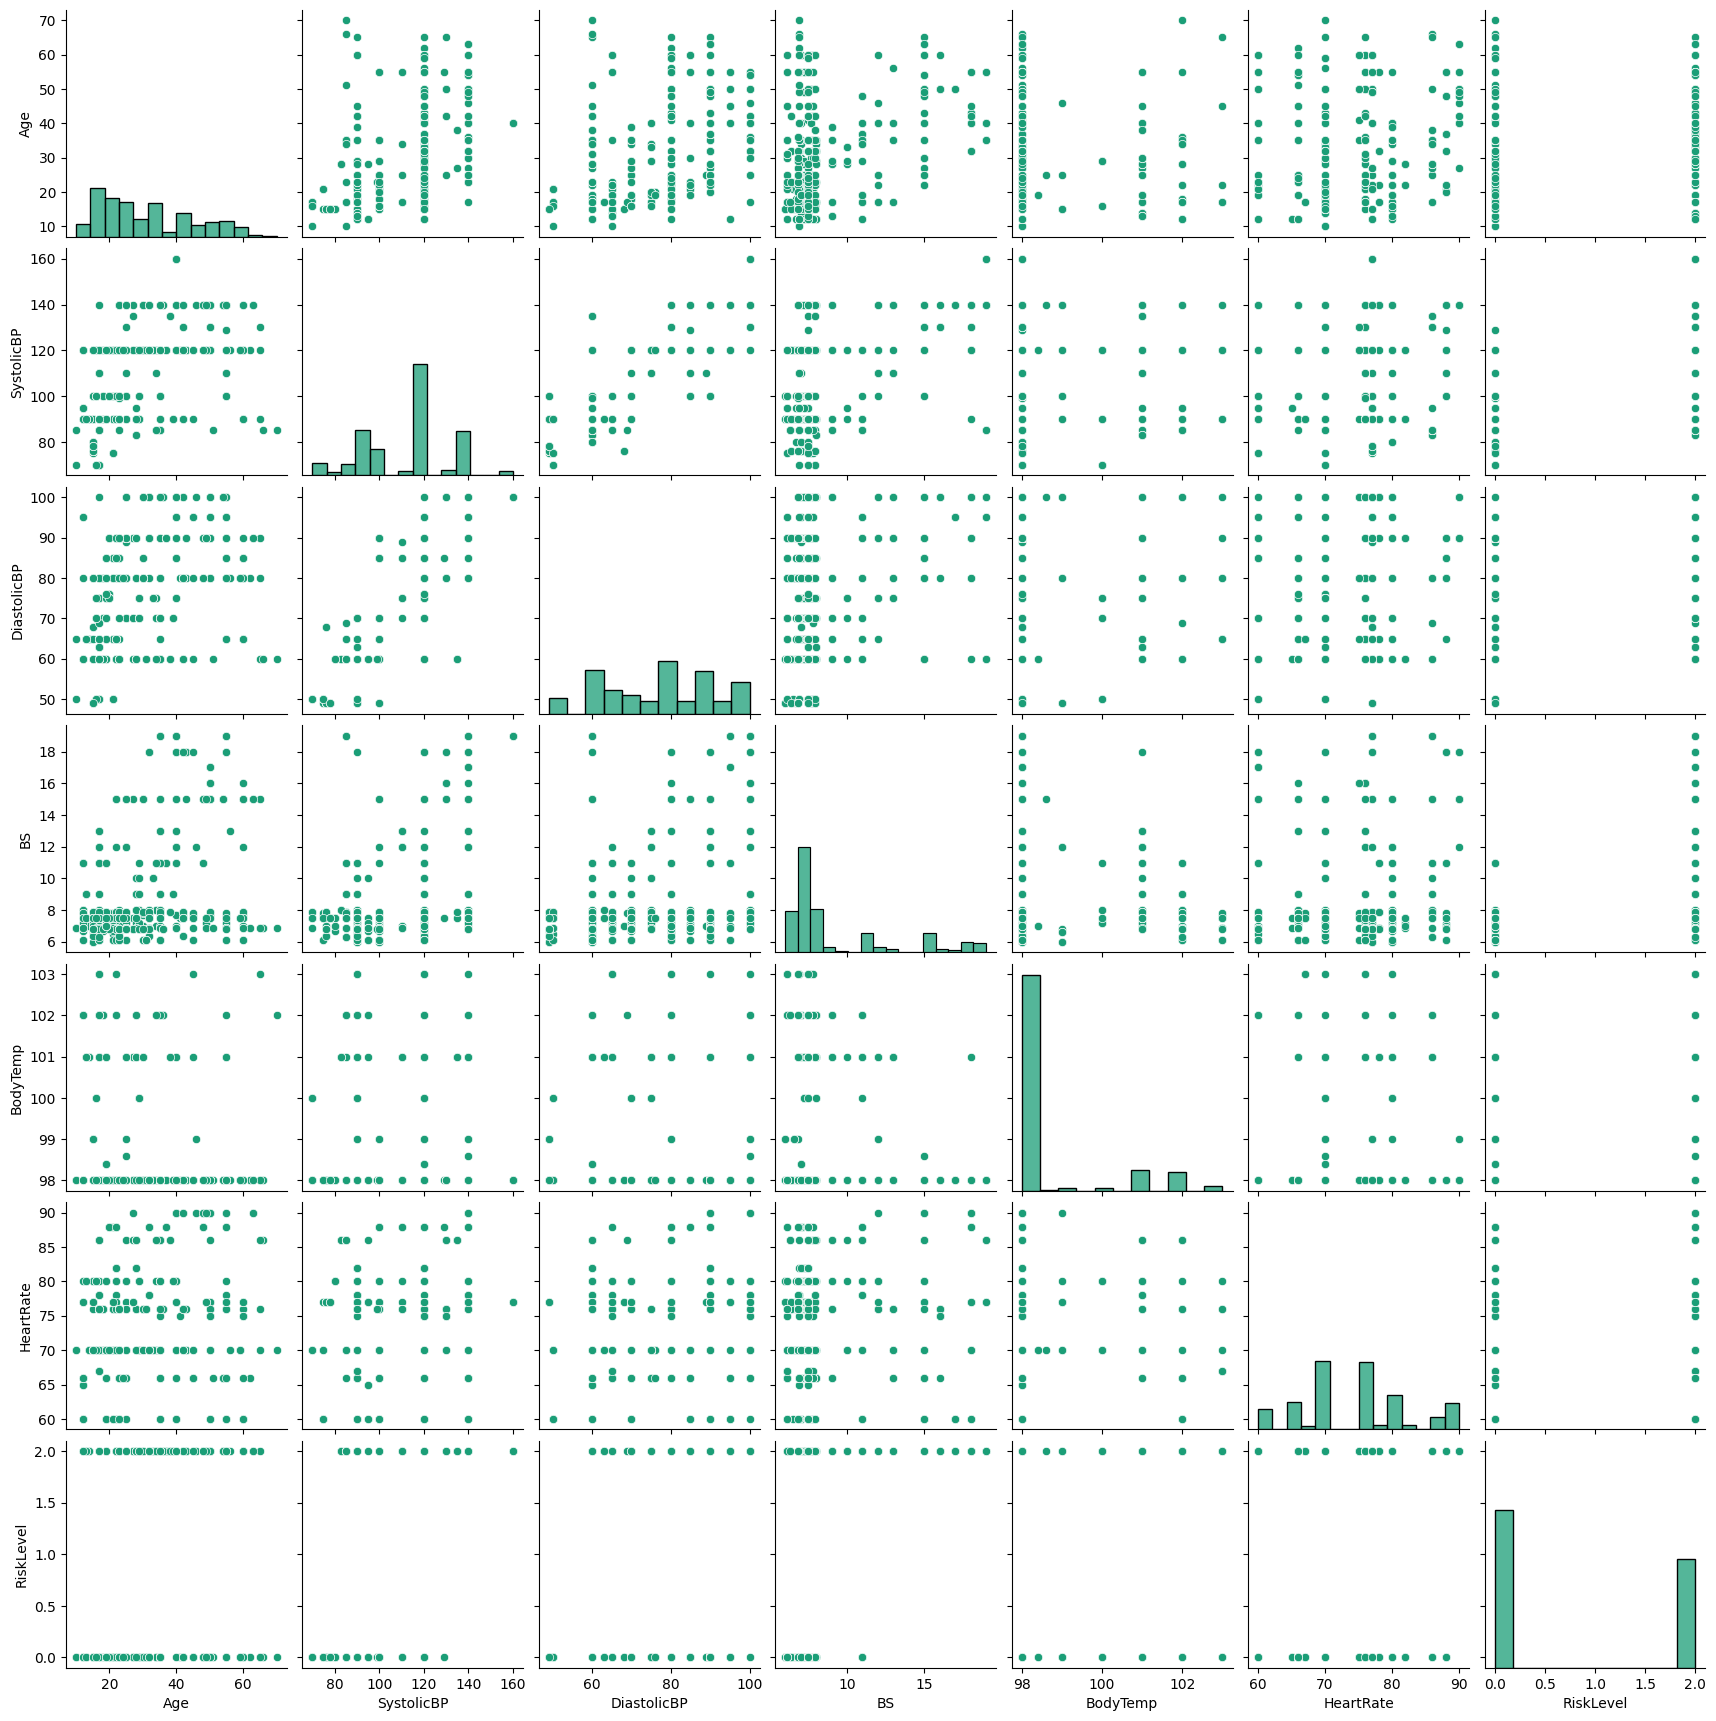

In [29]:
sns.pairplot(df);

Visually, it looks like BS (blood sugar) and BodyTemp (body temperature) are highly skewed.They both have a longer tail to the right.

In [30]:
skew_limit = 0.75 # define a limit above which we will log transform

# Create a list of numerical colums to check for skewing
mask = data.dtypes != object
num_cols = data.columns[mask]

skew_vals = df[num_cols].skew()

In [31]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BodyTemp,1.870745
BS,1.515875


In our case, we have skewness of blood sugar ~2.26 and of body temperature around 1.75, which is considered highly skewed data. Skew of age is around 0.92, which is moderate skewness.

# Log

0.04260628894432674


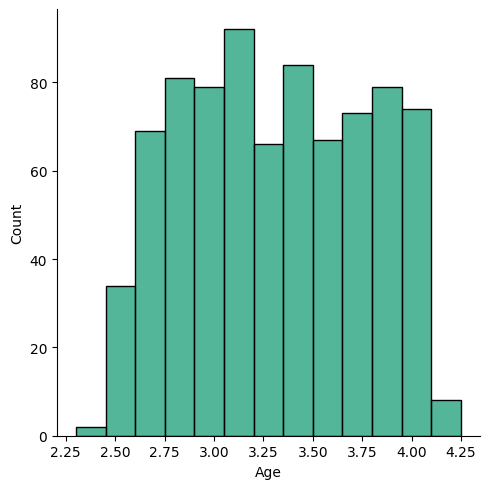

In [32]:
df_transformed = df.copy()

df_transformed["Age"] = df["Age"].apply(np.log)
print(df_transformed["Age"].skew())
sns.displot(df_transformed.Age);

* Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

In [33]:
bc_result = boxcox(df.BS)
boxcox_bs = pd.DataFrame(bc_result[0], columns=['BS'])
lambd = bc_result[1]

In [34]:
lambd

-2.498217674294602

BS    0.364454
dtype: float64


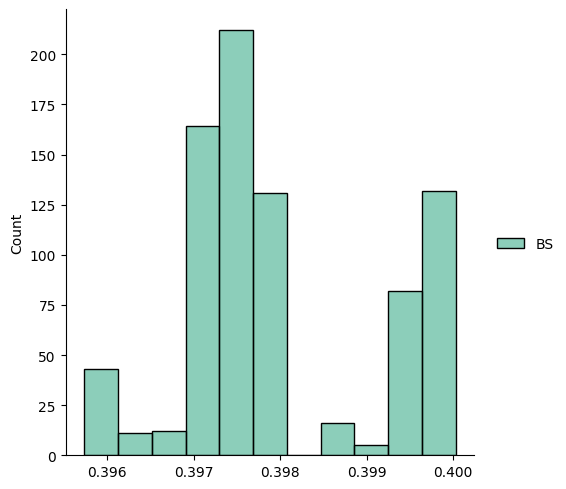

In [35]:
print(boxcox_bs.skew())
sns.displot(boxcox_bs);

In [36]:
df_transformed['BS'] = boxcox_bs['BS']

In [37]:
df_transformed[['BS', 'Age']].skew().to_frame().rename(columns={0:'Skew'}).sort_values('Skew', ascending=False)

,Skew
BS,0.364454
Age,0.042606


After performing the log and boxcox transformations, the skewness of:

blood sugar lowered from 2.26 to 0.26.

and age 0.92 to 0.2

It made the distributions fairly normal.

# Data Preprocessing

In [55]:
X = df_transformed.drop('RiskLevel', axis=1)
y = df_transformed['RiskLevel']

In [56]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# ML Models

In [58]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_preds = knn.predict(X_test)

In [59]:
print('K Nearest Neighbors K=1')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors K=1


[[140   4]
 [  3  96]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           2       0.96      0.97      0.96        99

    accuracy                           0.97       243
   macro avg       0.97      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



In [60]:
# K Value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

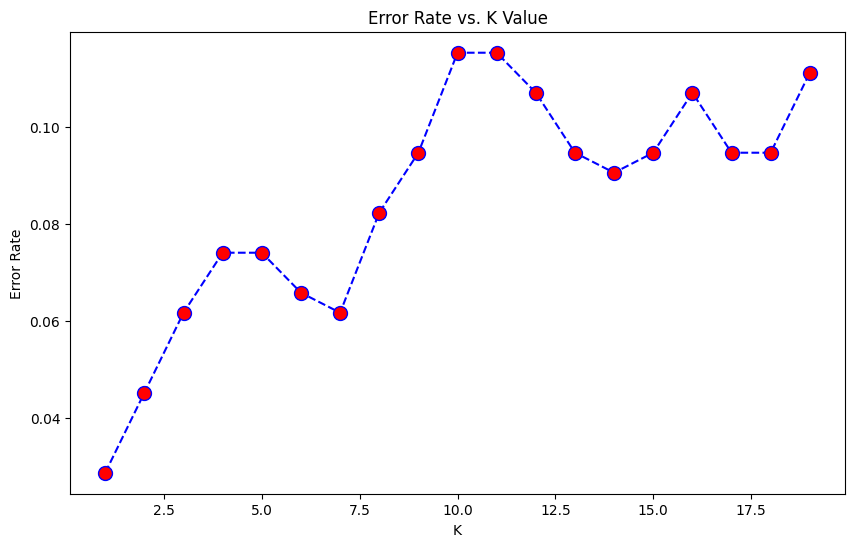

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [62]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors K=2')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors K=2


[[141   3]
 [ 13  86]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       144
           2       0.97      0.87      0.91        99

    accuracy                           0.93       243
   macro avg       0.94      0.92      0.93       243
weighted avg       0.94      0.93      0.93       243



In [63]:
class_weight = {0: 0.2, 1: 0.4, 2: 0.4}

In [64]:
#SVC model
svc = SVC(class_weight=class_weight)
svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svcKernel_pred = svc.predict(X_test)

# Evaluate the model
print('Support Vector Machine')
print('\n')
print(confusion_matrix(y_test, svcKernel_pred))
print("\n")
print(classification_report(y_test, svcKernel_pred))

Support Vector Machine


[[124  20]
 [  3  96]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.92       144
           2       0.83      0.97      0.89        99

    accuracy                           0.91       243
   macro avg       0.90      0.92      0.90       243
weighted avg       0.92      0.91      0.91       243



In [65]:
# Forest Classifier
forest = RandomForestClassifier(class_weight=class_weight)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 25, 30],
    'min_samples_leaf': [2, 3, 5] 
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 3, 'n_estimators': 100}
Best Accuracy:  0.9539823008849557


In [66]:
forest_pred = grid_search_forest.predict(X_test)

In [67]:
print('Random Forest')
print('\n')
print(confusion_matrix(y_test, forest_pred))
print('\n')
print(classification_report(y_test, forest_pred))

Random Forest


[[139   5]
 [  8  91]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       144
           2       0.95      0.92      0.93        99

    accuracy                           0.95       243
   macro avg       0.95      0.94      0.94       243
weighted avg       0.95      0.95      0.95       243



In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print('DecisionTreeClassifier:')
model_dec = DecisionTreeClassifier(random_state = 42)
model_dec.fit(X_train , y_train)

y_predict = model_dec.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

DecisionTreeClassifier:
Accuracy : 0.96
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       144
           2       0.92      0.98      0.95        99

    accuracy                           0.96       243
   macro avg       0.95      0.96      0.96       243
weighted avg       0.96      0.96      0.96       243



# Conclusion

We got the best accuracy with KNN model

In [70]:
import pickle
with open('/kaggle/working/KNN.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)